# Data Visualization Project on Ligue 1 Current Players

## 1. Read Essential Libraries

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

## 2. Scraping data using the method we used on Premier League

In [3]:
def Team(sequence):
    #Things we need (Name, Value, Age, Position, Number, Team)
    Player_List = []
    Value_List = []
    Age_List = []
    Position_List = []
    Number_List = []
    Team_List = []
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    for i in range(len(sequence)):
        e = sequence[i]
        # Scraping
        pageTree = requests.get(e, headers=headers)
        pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
        Players = pageSoup.find_all("td", {"class": "hide"})
        Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
        Age = pageSoup.find_all("td", {"class": "zentriert"})
        Position = pageSoup.find_all("tr")
        Number = pageSoup.find_all("td")
        a = 0
        b = 0 
        c = 1
        d = 4
        e = 3
        while a < len(Players):
            Player_List.append(Players[a].text)
            a = a + 1
            Team_List.append(sequence[i][32:(len(sequence[i])-22)])
        while b < len(Values):
            Value_List.append(Values[b].text)
            b = b + 1
        while c < (1+len(Players)*3):
            Age_List.append(Age[c].text)
            c = c + 3
        while d < (4+len(Players)*3):
            Position_List.append(Position[d].text)
            d = d + 3 
        while e < (3+len(Players)*9):
            Number_List.append(Number[e].text)
            e = e + 9
    # Return these results to dataframe
    Player = pd.DataFrame({'Player':Player_List})
    Value = pd.DataFrame({'Value':Value_List})
    Age = pd.DataFrame({'Age':Age_List})    
    Position = pd.DataFrame({'Position':Position_List})  
    Number = pd.DataFrame({'Number':Number_List})  
    Club = pd.DataFrame({'Club':Team_List})
    return Player, Value, Age, Position, Number, Club

In [4]:
# Scrapping 20 Clubs data
Player,Value,Age, Position, Number, Club = Team(['https://www.transfermarkt.co.uk/sc-amiens/startseite/verein/1416',
      'https://www.transfermarkt.co.uk/sco-angers/startseite/verein/1420',
      'https://www.transfermarkt.co.uk/fc-girondins-bordeaux/startseite/verein/40',
      'https://www.transfermarkt.co.uk/stade-brest-29/startseite/verein/3911',
      'https://www.transfermarkt.co.uk/fco-dijon/startseite/verein/2969',
      'https://www.transfermarkt.co.uk/osc-lille/startseite/verein/1082',
      'https://www.transfermarkt.co.uk/olympique-lyon/startseite/verein/1041',
      'https://www.transfermarkt.co.uk/olympique-marseille/startseite/verein/244',
      'https://www.transfermarkt.co.uk/fc-metz/startseite/verein/347',
      'https://www.transfermarkt.co.uk/olympique-nimes/startseite/verein/1160',
      'https://www.transfermarkt.co.uk/as-monaco/startseite/verein/162',
      'https://www.transfermarkt.co.uk/hsc-montpellier/startseite/verein/969',
      'https://www.transfermarkt.co.uk/fc-nantes/startseite/verein/995',
      'https://www.transfermarkt.co.uk/ogc-nizza/startseite/verein/417',
      'https://www.transfermarkt.co.uk/fc-paris-saint-germain/startseite/verein/583',
      'https://www.transfermarkt.co.uk/stade-reims/startseite/verein/1421',
      'https://www.transfermarkt.co.uk/fc-stade-rennes/startseite/verein/273',
      'https://www.transfermarkt.co.uk/as-saint-etienne/startseite/verein/618',
      'https://www.transfermarkt.co.uk/racing-strassburg/startseite/verein/667',
      'https://www.transfermarkt.co.uk/fc-toulouse/startseite/verein/415'])

In [5]:
#Join together
Ligue1 =  Player.join(Value).join(Age).join(Position).join(Number).join(Club)

In [6]:
# Transform player value to float for further analysis
Ligue1[['Value']] = pd.concat([Value[col].str.split()
                       .str[0]
                       .str.replace('£','')
                       .str.replace('k','000')
                       .str.replace('m','').astype(float) for col in Value], axis=1)

In [7]:
# Transform value to the same standard (Million £)
Filter = Ligue1[Ligue1.Value>200].copy(deep=False)
Filter['Value'] = Filter['Value'].div(1000000).round(2)
Ligue1[Ligue1.Value>200] = Filter

In [8]:
# Transform player birth date and age to age (numeric)
Ligue1 = Ligue1.sort_values('Value',ascending = False).reset_index(drop = 'True')
Age = Ligue1['Age'].str[-3:-1]
Ligue1['Age'] = Age.astype(int)

In [9]:
# Some names are spelled in a wrong way
Ligue1['Club'].unique()

array(['fc-paris-saint-germain', 'olympique-lyon/', 'olympique-marseille',
       'as-monaco', 'fc-stade-rennes', 'osc-lille/', 'as-saint-etienne',
       'ogc-nizza', 'fc-girondins-bordeau', 'fc-toulouse',
       'hsc-montpellier', 'racing-strassburg', 'sco-angers/', 'fc-nantes',
       'fc-metz', 'fco-dijon/', 'stade-reims/', 'stade-brest-29/',
       'olympique-nimes/', 'sc-amiens/'], dtype=object)

In [11]:
# Replace them
Ligue1.Club.replace(['olympique-lyon/','osc-lille/','ogc-nizza','fc-girondins-bordeau','racing-strassburg',
                      'sco-angers/','fco-dijon/','stade-reims/','stade-brest-29/','olympique-nimes/','sc-amiens/'],
                    ['olympique-lyon','osc-lille','ogc-nice','fc-bordeaux','racing-strasbourg',
                      'sco-angers','fco-dijon','stade-reims','stade-brest-29','olympique-nimes','sc-amiens'],inplace=True)

#### Scraping Nationalities

In [13]:
def Citizenship(x):
    headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    Country = []
    i = 0
    while i < len(x.Player):
        player = x.Player[i]
        data = requests.get("https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={}&x=0&y=0".format(player),headers=headers) 
        soup = BeautifulSoup(data.text, "lxml")
        hrefs = soup.find_all("img", {"class" : "flaggenrahmen"},alt=True)
        Flag = hrefs[16]['alt']
        Country.append(Flag)
        i = i+1
    return Country

In [14]:
# Scraping nationality
Citizenship = Citizenship(Ligue1)

In [15]:
# Join this column to Bundesliga dataset we already have
Ligue1 = Ligue1.join(pd.DataFrame({'Citizenship':Citizenship}))

In [82]:
pd.set_option('display.max_rows', 600)
Ligue1

,Player,Value,Age,Position,Number,Club,Citizenship
0,Kylian Mbappé,180.00,21,Centre-Forward,7,fc-paris-saint-germain,France
1,Neymar,144.00,27,Left Winger,10,fc-paris-saint-germain,Brazil
2,Mauro Icardi,67.50,26,Centre-Forward,18,fc-paris-saint-germain,Argentina
3,Marco Verratti,67.50,27,Central Midfield,6,fc-paris-saint-germain,Italy
4,Marquinhos,58.50,25,Centre-Back,5,fc-paris-saint-germain,Brazil
5,Memphis Depay,49.50,25,Left Winger,11,olympique-lyon,Netherlands
6,Houssem Aouar,45.00,21,Central Midfield,8,olympique-lyon,France
7,Florian Thauvin,36.00,26,Right Winger,26,olympique-marseille,France
8,Wissam Ben Yedder,36.00,29,Centre-Forward,9,as-monaco,France
9,Ángel Di María,36.00,31,Right Winger,11,fc-paris-saint-germain,Argentina


In [18]:
Hilton = Ligue1[Ligue1.Player=='Hilton'].copy(deep=False)
Hilton['Citizenship'] = 'Brazil'
Ligue1[Ligue1.Player=='Hilton'] = Hilton
Pablo = Ligue1[Ligue1.Player=='Pablo'].copy(deep=False)
Pablo['Citizenship'] = 'Brazil'
Ligue1[Ligue1.Player=='Pablo'] = Pablo
Danilo = Ligue1[Ligue1.Player=='Danilo'].copy(deep=False)
Danilo['Citizenship'] = 'Brazil'
Ligue1[Ligue1.Player=='Danilo'] = Danilo
Rafael = Ligue1[Ligue1.Player=='Rafael'].copy(deep=False)
Rafael['Citizenship'] = 'Brazil'
Ligue1[Ligue1.Player=='Rafael'] = Rafael
Jorge = Ligue1[Ligue1.Player=='Jorge'].copy(deep=False)
Jorge['Citizenship'] = 'Brazil'
Ligue1[Ligue1.Player=='Jorge'] = Jorge
Adama = Ligue1[Ligue1.Player=='Adama Traoré'].copy(deep=False)
Adama['Citizenship'] = 'Mali'
Ligue1[Ligue1.Player=='Adama Traoré'] = Adama
Dante = Ligue1[Ligue1.Player=='Dante'].copy(deep=False)
Dante['Citizenship'] = 'Brazil'
Ligue1[Ligue1.Player=='Dante'] = Dante

## 3. Data Visualization

#### 10 Most Valuable Player

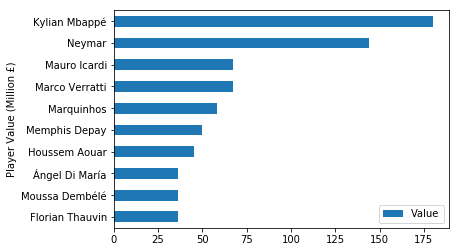

In [102]:
Top10Player = Ligue1.sort_values('Value',ascending = False).iloc[:10][['Player','Value']].plot.barh('Player','Value')
Top10Player.invert_yaxis()
plt.ylabel('Player Value (Million £)')
plt.show()

#### How many countries have Ligue1 players

In [108]:
print('Players come from '+str(len(Ligue1.groupby('Citizenship')))+' Countries')

Players come from 65 Countries


#### Foreign Players Origin Top 10

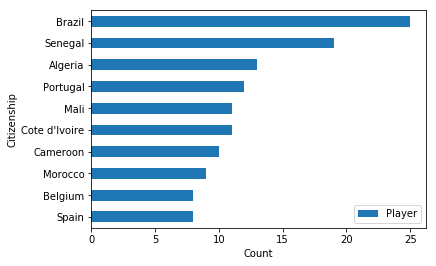

In [67]:
CitizenshipCount = Ligue1.groupby('Citizenship')[['Player']].count().sort_values('Player',ascending = False)[1:11].plot.barh()
CitizenshipCount.invert_yaxis()
plt.xlabel('Count')
plt.show()

#### Players Age Distribution

In [31]:
Ligue1.Age.describe()

count    548.000000
mean      24.793796
std        4.656716
min       16.000000
25%       21.000000
50%       24.000000
75%       28.000000
max       42.000000
Name: Age, dtype: float64

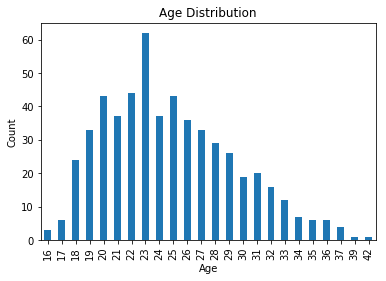

In [34]:
Ligue1.groupby('Age')['Player'].count().plot.bar()
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### Team Total Value

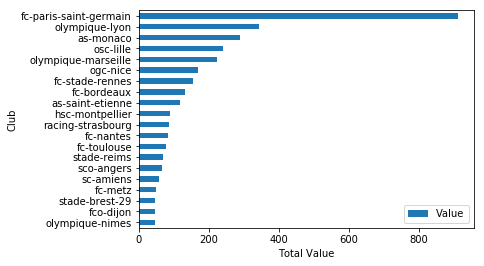

In [59]:
ClubValue = Ligue1.groupby('Club')[['Value']].sum().sort_values('Value',ascending = False).plot.barh()
ClubValue.invert_yaxis()
plt.xlabel('Total Value')
plt.show()